In [1]:
import numpy as np


In [13]:
4%4

0

In [119]:
import sys
import itertools


class IntcodeMachine:
    VERBOSE=True
    def __init__(self, data,first=False):
        self.memory = data
        self.pointer = 0
        self.size = len(data)
        self.out = 0
        self.halt = False
        self.initialized = False
        self.relBase = 0
        
        self.painted_x = dict()
        self.painted_y = dict()
        self.current_pos = [0,0]
        # do a self.direction%4
        # {0:up,1:right,2:down,3:left}
        self.direction = 0
        self.ticker = 0
        self.paint_history = []
        self.colour = 1
        self.first = first
        
       

    def process(self, inputArg = None):
        if inputArg != None:  
            self.initialized = True
        
        while self.pointer < self.size:
            opcode = int(str(self.memory[self.pointer])[-2:])
            paramModes = str(self.memory[self.pointer])[:-2]
            if (opcode == 99): # HALT
                self.halt = True
                print('halt')
                break
            elif (opcode == 1): # OPCODE 01 - Sum
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) + self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 2): # OPCODE 02 - Multiply
                self.__setParam(paramModes, 3, self.__getParam(paramModes,1) * self.__getParam(paramModes,2))
                self.pointer += 4
            elif (opcode == 3):  # OPCODE 03 - Input
                if inputArg != None:
                    self.__setParam(paramModes, 1, inputArg)
                    inputArg = None
                else:
                    if VERBOSE:
                        most_recent = 0 
                        for x,y,z in machine.paint_history:
                            if x==self.current_pos[0] and y ==self.current_pos[1]:
                                most_recent = z
                        if self.first:
                            self.first = False
                            self.__setParam(paramModes, 1, 1)


                        else:
                            self.__setParam(paramModes, 1, most_recent)
                    else:
                        break
                self.pointer += 2
            elif (opcode == 4):  # OPCODE 04 - Print
                out = self.__getParam(paramModes,1)
                self.ticker +=1

#                if VERBOSE:
#                    print(">> " + str(out))
                
                self.out = out
                if self.ticker ==1:
                    self.colour=out
                    #print(out)
                

                if self.ticker ==2:
                    if out ==0:
                        self.direction-=1
                    elif out ==1:
                        self.direction+=1

                    self.direction = self.direction%4
                    self.make_moves()

                    self.ticker =0


                
                self.pointer += 2
            # Start of part 2
            elif (opcode == 5):  # OPCODE 05 - JNZ (jump if not zero)
                if (self.__getParam(paramModes,1) != 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 6):  # OPCODE 06 - JZ (jump if zero)
                if (self.__getParam(paramModes,1) == 0):
                    self.pointer = self.__getParam(paramModes,2)
                else:
                    self.pointer += 3
            elif (opcode == 7):  # OPCODE 07 - Set 1 if first is less than second else 0
                if (self.__getParam(paramModes,1) < self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif (opcode == 8):  # OPCODE 08 - Set 1 if first is equal to second else 0
                if (self.__getParam(paramModes,1) == self.__getParam(paramModes,2)):
                    self.__setParam(paramModes, 3, 1)
                else:
                    self.__setParam(paramModes, 3, 0)
                self.pointer += 4
            elif opcode == 9:
                self.relBase += self.__getParam(paramModes,1)
                self.pointer += 2
            else:
                print(str(self.memory[self.pointer]) + " Something went wrong :(")
                break

    def __getParam(self, paramModes, param):
        return self.memory[self.__getParamAddress(paramModes, param)]

    def __setParam(self, paramModes, param, value):
        self.memory[self.__getParamAddress(paramModes, param)] = value
    
    def __getParamAddress(self, paramModes, param):
        type = 0
        try:
            type = int(paramModes[-param])
        except:
            pass
        if type == 0:
            return self.memory[self.pointer + param]
        elif type == 1:
            return self.pointer + param
        elif type == 2:
            offset = self.memory[self.pointer + param]
            return self.relBase + offset
        else:
            print('Param type error')
            return 0
        
        
    def make_moves(self):
        #paint current pos tile
        self.paint_history.append([self.current_pos[0],self.current_pos[1],self.colour])
        #do a turn
        
        #{0:up,1:right,2:down,3:left}
        if self.direction==0:
            dx=0
            dy=1
        elif self.direction ==1:
            dx=1
            dy=0
        elif self.direction ==2:
            dx=0
            dy=-1
        elif self.direction ==3:
            dx=-1
            dy=0
            
        self.current_pos = [self.current_pos[0]+dx, self.current_pos[1]+dy]
    
    
VERBOSE=True
data = list(map(lambda x: int(x), open('./input-11.txt', "r").read().split(','))) + [0 for i in range(10000)]
machine = IntcodeMachine(data)
machine.process()


halt


In [121]:
painted = set()
for x,y,c in machine.paint_history:
    mystr = str(x)+'_'+str(y)
    #print(mystr)
    painted.add(mystr)

In [122]:
len(painted)

2343

In [123]:
data = list(map(lambda x: int(x), open('./input-11.txt', "r").read().split(','))) + [0 for i in range(10000)]
machine = IntcodeMachine(data,True)
machine.process()

halt


In [124]:
painted = set()
for x,y,c in machine.paint_history:
    mystr = str(x)+'_'+str(y)
    #print(mystr)
    painted.add(mystr)
    
len(painted)

249

In [125]:
most_recent = 0 
for x,y,z in machine.paint_history:
    if x==2 and y ==2:
        most_recent = z


In [126]:
import matplotlib.pyplot as plt

In [127]:
hist = np.asarray(machine.paint_history)

In [128]:
np.max(hist.T[0:2],axis=1)
np.min(hist.T[0:2],axis=1)

array([ 0, -5])

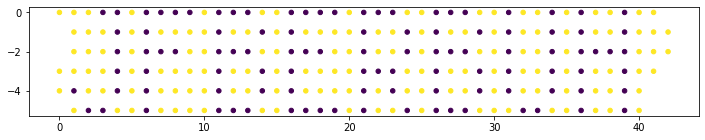

In [129]:
plt.figure(figsize=(12,2))
plt.scatter(hist.T[0],hist.T[1],c=1-hist.T[2],s=20)

In [131]:
#JFBERBUH